In [1]:
#import pytorch modules
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import transforms, datasets
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt


In [3]:
# load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [4]:
# create the trainloader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [5]:
# MLP class
class MLP(nn.Module):
    def __init__(self, num_features, num_hidden1, num_hidden2, output_size):
        super().__init__()

        self.hl1 = nn.Linear(num_features, num_hidden1)
        self.hl2 = nn.Linear(num_hidden1, num_hidden2)
        self.output = nn.Linear(num_hidden2, output_size)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # flatten to 784x1 array
        x = x.view(x.size(0), -1)
        x = self.hl1(x)
        x = self.relu(x)
        x = self.hl2(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [6]:
# define loss and optimizer
model = MLP(num_features=784, num_hidden1=256, num_hidden2=128, output_size=10)
completelyrandomname = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
# define encoding into one-hot format
def encode(labels, num_classes=10):
    return torch.eye(num_classes)[labels]

In [9]:
# train
num_epochs = 10
losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        # forward pass
        one_hot = encode(labels, 10)
        outputs = model.forward(images)
        loss_value = completelyrandomname(outputs, one_hot)

        # backward pass and optimization
        loss_value.backward()
        optimizer.step()

    losses.append(loss_value.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_value.item():.4f}')

Epoch [1/10], Loss: 0.0819
Epoch [2/10], Loss: 0.0806
Epoch [3/10], Loss: 0.0776
Epoch [4/10], Loss: 0.0786
Epoch [5/10], Loss: 0.0736
Epoch [6/10], Loss: 0.0774
Epoch [7/10], Loss: 0.0811
Epoch [8/10], Loss: 0.0716
Epoch [9/10], Loss: 0.0584
Epoch [10/10], Loss: 0.0647


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 55.31%


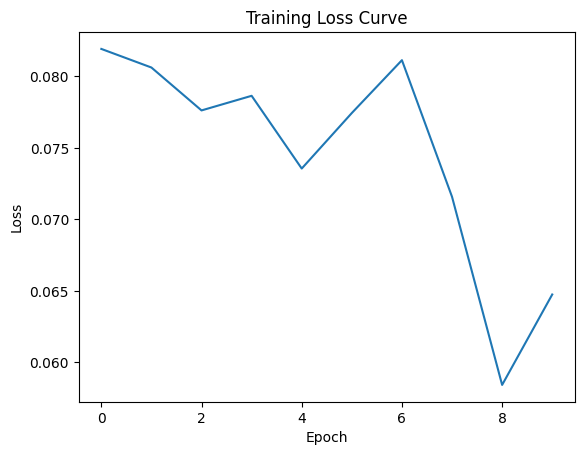

In [11]:
# plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()